Measurement Update: [4.999502985479712, 1.4118604966752613]
Prediction Update: [5.999502985479712, 3.6618604966752613]


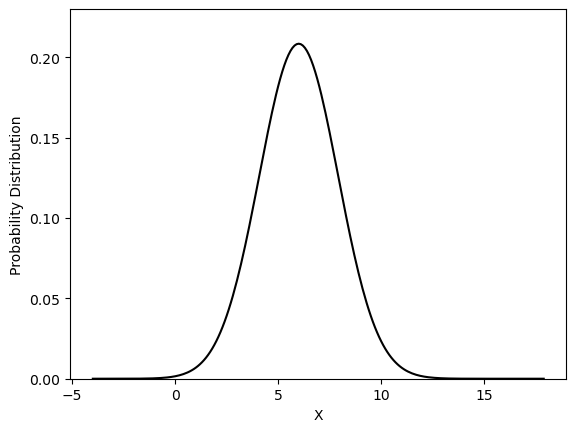

Measurement Update: [6.05609326290838, 1.0335600353339127]
Prediction Update: [7.05609326290838, 3.2835600353339127]


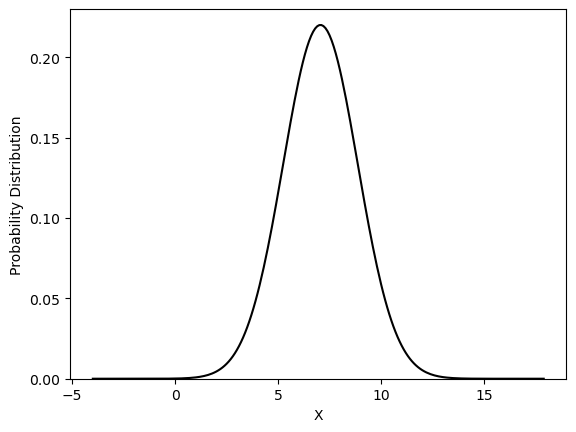

Measurement Update: [7.008507480806178, 1.0010090727144922]
Prediction Update: [9.008507480806177, 3.251009072714492]


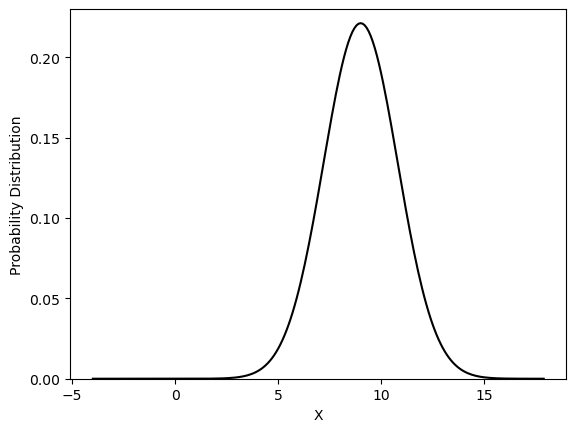

Measurement Update: [9.036592957853202, 0.9979629099288665]
Prediction Update: [10.036592957853202, 3.2479629099288667]


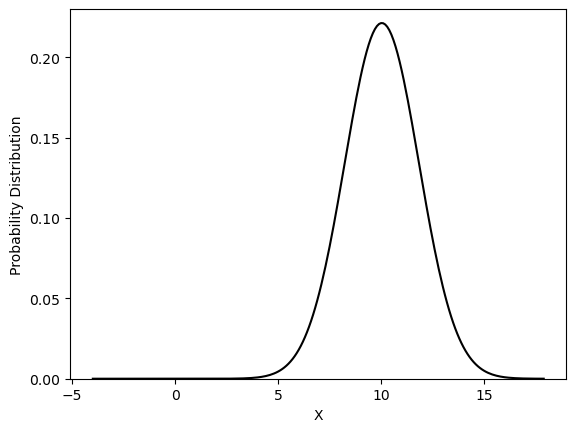

Measurement Update: [9.994635744648289, 0.9976756813480285]
Prediction Update: [10.994635744648289, 3.2476756813480288]


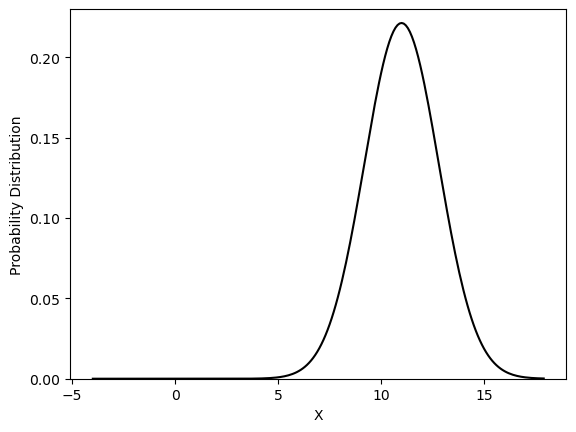

In [1]:
from matplotlib import pyplot as plt # import matplotlib
import numpy as np # import NumPy module

# Function for Measurement Update
def MeasureUpdate(mu1, var1, mu2, var2):
    ''' This function takes 2 means and 2 variance parameters
        and returns measurement update parameters.'''
    new_mu = (mu1*var1 + mu2*var2) / (var1 + var2)
    new_var = 1 / ((1 / var1) + (1 / var2))
    return [new_mu, new_var]
   
# Function for Prediction/Motion Update   
def PredictUpdate(mu1, var1, mu2, var2):
    ''' This function takes 2 means and 2 variance parameters
        and returns prediction update parameters.'''
    new_mu = mu1 + mu2
    new_var = var1 + var2
    return [new_mu, new_var]

measurement_mu = [5.1, 6.2, 6.9, 9.1, 9.9] # in meter
measurement_var = 1.2**2 # in meter
motion_mu = [1, 1, 2, 1, 1] # in meter
motion_var = 1.5**2 # in meter

mu,var = 4.9975, 8.5**2 # initial mean and variance of vehicle position from GPS
x = np.arange(-4,18,0.1)

for n in range(len(measurement_mu)):
    # measurement update with measured GPS-sensor uncertainty
    mu, var = MeasureUpdate(mu, var, measurement_mu[n], measurement_var)
    print('Measurement Update: [{}, {}]'.format(mu,var))
    # prediction update with model motion uncertainty
    mu, var = PredictUpdate(mu, var, motion_mu[n], motion_var)
    print('Prediction Update: [{}, {}]'.format(mu,var))
    
    ProbDist = np.exp(-np.square(x-mu)/(2*var))/(np.sqrt(2*np.pi*var))
    plt.plot(x,ProbDist,'k-')
    plt.ylabel('Probability Distribution'), plt.xlabel('X'), plt.ylim(0, 0.23)
    plt.pause(0.2) # pause for 0.2 sec during plot graph
plt.show()